## CS441: Applied ML - HW 2

### Part 1: Model Complexity and Tree-based Regressors

Include all the code for Part 1 in this section

In [ ]:
import numpy as np
from google.colab import drive
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

# load data (modify to match your data directory or comment)
def load_temp_data():
  drive.mount('/content/drive')
  datadir = "/content/drive/MyDrive/" 
  T = np.load(datadir + 'temperature_data.npz')
  x_train, y_train, x_val, y_val, x_test, y_test, dates_train, dates_val, dates_test, feature_to_city, feature_to_day = \
  T['x_train'], T['y_train'], T['x_val'], T['y_val'], T['x_test'], T['y_test'], T['dates_train'], T['dates_val'], T['dates_test'], T['feature_to_city'], T['feature_to_day']
  return (x_train, y_train, x_val, y_val, x_test, y_test, dates_train, dates_val, dates_test, feature_to_city, feature_to_day)

# plot one data point for listed cities and target temperature
def plot_temps(x, y, cities, feature_to_city, feature_to_day, target_date):
  nc = len(cities)
  ndays = 5
  xplot = np.array([-5,-4,-3,-2,-1])
  yplot = np.zeros((nc,ndays))
  for f in np.arange(len(x)):
    for c in np.arange(nc):
      if cities[c]==feature_to_city[f]:
        yplot[feature_to_day[f]+ndays,c] = x[f]
  plt.plot(xplot,yplot)
  plt.legend(cities)
  plt.plot(0, y, 'b*', markersize=10)
  plt.title('Predict Temp for Cleveland on ' + target_date)
  plt.xlabel('Day')
  plt.ylabel('Avg Temp (C)')
  plt.show()

# load data
(x_train, y_train, x_val, y_val, x_test, y_test, dates_train, dates_val, dates_test, feature_to_city, feature_to_day) = load_temp_data()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# to plot the errors
def plot_depth_error(max_depths, tree_train_err, tree_val_err, rf_train_err, rf_val_err, bt_train_err, bt_val_err):
  plt.figure(figsize=(15,15))
  plt.semilogx(max_depths, tree_train_err, 'r.--',label='tree train')
  plt.semilogx(max_depths, tree_val_err, 'r.-', label='tree val')
  plt.semilogx(max_depths, rf_train_err, 'g.--',label='RF train')
  plt.semilogx(max_depths, rf_val_err, 'g.-', label='RF val')
  plt.semilogx(max_depths, bt_train_err, 'b.--',label='BT train')
  plt.semilogx(max_depths, bt_val_err, 'b.-', label='BT val')
  plt.ylabel('RMSE Error')
  plt.xlabel('Max Tree Depth')
  plt.xticks(max_depths, max_depths)
  plt.legend()
  plt.rcParams.update({'font.size': 20})
  plt.show()

depth is  2
the tree_error is 4.180186878294657 and the tree_train error is 3.853775288580611
depth is  4
the tree_error is 2.7824550803227828 and the tree_train error is 2.7393624539359602
depth is  8
the tree_error is 3.1660985459032194 and the tree_train error is 1.590500147026231
depth is  16
the tree_error is 3.531087937090842 and the tree_train error is 0.2019693211062419
depth is  32
the tree_error is 3.575674665719533 and the tree_train error is 0.0
depth is  2
the tree_error is 3.2922099826318467 and the tree_train error is 3.2671128356218846
depth is  4
the tree_error is 2.5983948454049997 and the tree_train error is 2.508116792216024
depth is  8
the tree_error is 2.463336734101179 and the tree_train error is 1.4148778431504683
depth is  16
the tree_error is 2.443638933567549 and the tree_train error is 0.9733871074892997
depth is  32
the tree_error is 2.4362441512373825 and the tree_train error is 0.9772468426355216
depth is  2
the tree_error is 2.521008916570206 and the tre

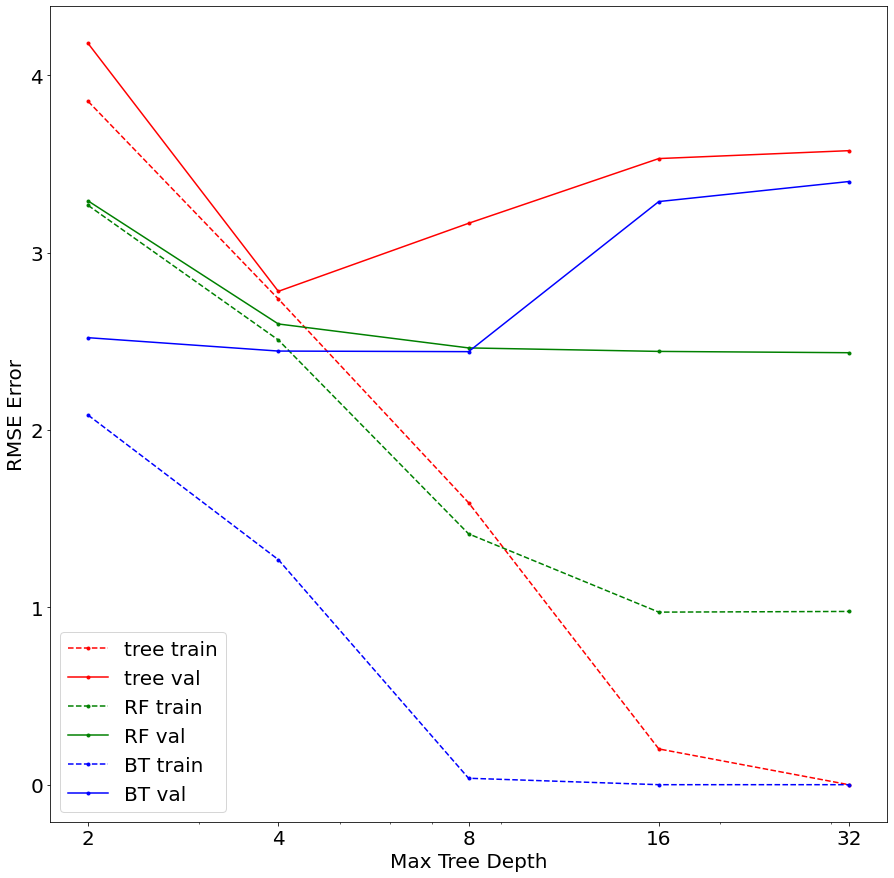

In [ ]:
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

max_depths = [2,4,8,16,32]
decision_error = []
decision_train_error = []
random_error = []
random_train_error = []
gradient_error = []
gradient_train_error = []
for value in max_depths:
  model = DecisionTreeRegressor(random_state=0, max_depth=value)
  model.fit(x_train, y_train)
  y_pred = model.predict(x_val)
  y_pred_train = model.predict(x_train)
  tree_error = np.sqrt(np.mean((y_val - y_pred)**2))
  tree_train_error = np.sqrt(np.mean((y_train - y_pred_train)**2))
  decision_error.append(tree_error)
  decision_train_error.append(tree_train_error)
  print("depth is ", value)
  print("the tree_error is {tree} and the tree_train error is {tree2}".format(tree = tree_error, tree2 = tree_train_error))

for value in max_depths:
  model = RandomForestRegressor(random_state=0, max_depth=value, max_features=1/3)
  model.fit(x_train, y_train)
  y_pred = model.predict(x_val)
  y_pred_train = model.predict(x_train)
  tree_error = np.sqrt(np.mean((y_val - y_pred)**2))
  tree_train_error = np.sqrt(np.mean((y_train - y_pred_train)**2))
  random_error.append(tree_error)
  random_train_error.append(tree_train_error)
  print("depth is ", value)
  print("the tree_error is {tree} and the tree_train error is {tree2}".format(tree = tree_error, tree2 = tree_train_error))

for value in max_depths:
  model = GradientBoostingRegressor(random_state=0, max_depth=value)
  model.fit(x_train, y_train)
  y_pred = model.predict(x_val)
  y_pred_train = model.predict(x_train)
  tree_error = np.sqrt(np.mean((y_val - y_pred)**2))
  tree_train_error = np.sqrt(np.mean((y_train - y_pred_train)**2))
  gradient_error.append(tree_error)
  gradient_train_error.append(tree_train_error)
  print("depth is ", value)
  print("the tree_error is {tree} and the tree_train error is {tree2}".format(tree = tree_error, tree2 = tree_train_error))
plot_depth_error(max_depths, decision_train_error, decision_error, random_train_error, random_error, gradient_train_error, gradient_error)


# usage examples
# model = DecisionTreeRegressor(random_state=0, max_depth=max_depth)
# model = RandomForestRegressor(random_state=0, max_depth=max_depth, max_features=1/3)
# model = GradientBoostingRegressor(random_state=0, max_depth=max_depth)

### Part 2: MLPs with MNIST

Include all the code for Part 2 in this section

In [25]:
# initialization code
import numpy as np
from keras.datasets import mnist
%matplotlib inline
from matplotlib import pyplot as plt
from scipy import stats
import torch
import torch.nn as nn
import torch.nn.functional as F

# loads MNIST data and reformat to 768-d vectors with values in range 0 to 1
# splits into train/val/test sets and provides indices for subsets of train
def load_mnist():
  (x_train, y_train), (x_test, y_test) = mnist.load_data()
  x_train = np.reshape(x_train, (len(x_train), 28*28))
  x_test = np.reshape(x_test, (len(x_test), 28*28))
  maxval = x_train.max()
  x_train = x_train/maxval
  x_test = x_test/maxval
  x_val = x_train[:10000]
  y_val = y_train[:10000]
  x_train = x_train[10000:]
  y_train = y_train[10000:]
  train_indices = dict()
  train_indices['xs'] = np.arange(50)
  train_indices['s'] = np.arange(500)
  train_indices['m'] = np.arange(5000)
  train_indices['all'] = np.arange(50000)
  return (x_train, y_train), (x_val, y_val), (x_test, y_test), train_indices

# displays a set of mnist images
def display_mnist(x, subplot_rows=1, subplot_cols=1):
  if subplot_rows>1 or subplot_cols>1:
    fig, ax = plt.subplots(subplot_rows, subplot_cols, figsize=(15,15))
    for i in np.arange(len(x)):
      ax[i].imshow(np.reshape(x[i], (28,28)), cmap='gray')
      ax[i].axis('off')
  else:
      plt.imshow(np.reshape(x, (28,28)), cmap='gray')
      plt.axis('off')
  plt.show()

# counts the number of examples per class
def class_count_mnist(y):
  count = np.zeros((10,),dtype='uint32')
  for i in np.arange(10):
    count[i] = sum(y==i)
  return count

In [26]:
(x_train, y_train), (x_val, y_val), (x_test, y_test), train_indices = load_mnist()

11490434/11490434 [==============================] - 0s 0us/step


In [27]:
# Sets device to "cuda" if a GPU is available  (in Colabs, enable GPU by Edit->Notebook Settings-->Hardware Accelerator=GPU)
device = "cuda" if torch.cuda.is_available() else 'cpu'

In [28]:
def display_error_curves(num_epochs, training_losses, validation_losses):
  """
  Plots the training and validation loss curves
  """

  plt.plot(range(num_epochs), training_losses, label="Training Loss")
  plt.plot(range(num_epochs), validation_losses, label="Validation Loss")

  # Add in a title and axes labels
  plt.title('Training and Validation Loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  
  # Display the plot
  plt.legend(loc='best')
  plt.show()

In [29]:
# Define the model
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

In [45]:
def train_MLP_mnist(train_loader, val_loader, test_loader, lr=1e-2, num_epochs=100):
  input_size = 784
  # hidden_size = 64
  hidden_size = 128 # for part c
  output_size = 10
  mlp = MLP(input_size, hidden_size, output_size).to(device)
  optimizer = torch.optim.SGD(mlp.parameters(), lr=lr)
  criterion = nn.CrossEntropyLoss()
  train_loss = []
  val_loss = []
  train_error = []
  val_error = []
  test_error = []
  for epoch in range(num_epochs):
    running_train_loss = 0
    running_val_loss = 0
    train_correct = 0
    val_correct = 0
    test_correct = 0
    for x_train, y_train in train_loader:
      x_train, y_train = x_train.to(device), y_train.to(device)
      optimizer.zero_grad()
      y_pred = mlp(x_train)
      loss = criterion(y_pred, y_train)
      loss.backward()
      optimizer.step()
      running_train_loss += loss.item()
      train_correct += sum(y_train == y_pred.argmax(dim=1)).item()
    for x_val, y_val in val_loader:
      x_val, y_val = x_val.to(device), y_val.to(device)
      y_pred = mlp(x_val)
      loss = criterion(y_pred, y_val)
      running_val_loss += loss.item()
      val_correct += sum(y_val == y_pred.argmax(dim=1)).item()
    for x_test, y_test in test_loader:
      x_test, y_test = x_test.to(device), y_test.to(device)
      y_pred = mlp(x_test)
      test_correct += sum(y_test == y_pred.argmax(dim=1)).item()
    epoch_train_loss = running_train_loss / len(train_loader)
    epoch_val_loss = running_val_loss / len(val_loader)
    train_loss.append(epoch_train_loss)
    val_loss.append(epoch_val_loss)
    train_error.append(100.0 * (1 - train_correct / len(train_loader.dataset)))
    val_error.append(100.0 * (1 - val_correct / len(val_loader.dataset)))
    test_error.append(100.0 * (1 - test_correct / len(test_loader.dataset)))
    if epoch in [24, 49, 99]:
      print(f"Epoch {epoch + 1}: Train Loss = {epoch_train_loss:.4f}, Val Loss = {epoch_val_loss:.4f}")
  mlp.train_loss = train_loss
  mlp.val_loss = val_loss
  mlp.train_error = train_error
  mlp.val_error = val_error
  mlp.test_error = test_error
  return mlp



In [49]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
learning_rates = [1.0, 0.1, 0.01, 0.001]
num_epochs = 100
batch_size = 256
train_loader = torch.utils.data.DataLoader(torch.utils.data.TensorDataset(torch.Tensor(x_train), torch.LongTensor(y_train)), batch_size=batch_size, shuffle=True)
val_loader = torch.utils.data.DataLoader(torch.utils.data.TensorDataset(torch.Tensor(x_val), torch.LongTensor(y_val)), batch_size=batch_size, shuffle=False)
test_loader = torch.utils.data.DataLoader(torch.utils.data.TensorDataset(torch.Tensor(x_test), torch.LongTensor(y_test)), batch_size=batch_size, shuffle=False)

# for lr in learning_rates:
#     mlp = train_MLP_mnist(train_loader, val_loader, test_loader, lr, num_epochs)
#     print(f"Learning Rate: {lr}")
#     print(f"Training Loss: {mlp.train_loss[-1]:.4f}")
#     print(f"Validation Loss: {mlp.val_loss[-1]:.4f}")
#     print(f"Validation Error: {mlp.val_error[-1]:.2f}%\n")
#     display_error_curves(num_epochs, mlp.train_loss, mlp.val_loss)
# lr = 0.1
# mlp = train_MLP_mnist(train_loader, val_loader, test_loader, lr, num_epochs)
# if mlp is not None:
#   print("Train Loss: {:.4f}".format(mlp.train_loss[-1]))
#   print("Validation Loss: {:.4f}".format(mlp.val_loss[-1]))
#   print("Train Error: {:.2f}%".format(mlp.train_error[-1]))
#   print("Validation Error: {:.2f}%".format(mlp.val_error[-1]))
#   if mlp.test_error is not None:
#     print("Test Error: {:.2f}%".format(mlp.test_error[-1]))

mlp = MLPClassifier(hidden_layer_sizes=(512,512,512), activation='relu', solver='adam',
                    alpha = 0.0001, batch_size = 256, learning_rate= 'adaptive',
                    learning_rate_init=0.001, max_iter= 500, shuffle=True,
                    random_state = 42, tol = 0.0001, verbose = False,
                    early_stopping= True, validation_fraction=0.1, 
                    n_iter_no_change= 20)
mlp.fit(x_train, y_train)
y_val_pred = mlp.predict(x_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
val_error = (1 - val_accuracy) * 100
print(f'Validation Error: {val_error:.4f}%')
y_test_pred = mlp.predict(x_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_error = (1 - test_accuracy) * 100
print(f'Test Error: {test_error:.4f}%')




Validation Error: 1.9000%
Test Error: 1.6600%


## Part 3: Predicting Penguin Species

Include all your code for part 3 in this section.  

In [50]:
import numpy as np
from google.colab import drive
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
#styling preferences for sns
sns.set_style('whitegrid')
sns.set_context('poster')
drive.mount('/content/gdrive/')
datadir = "/content/gdrive/MyDrive/CS441/hw2/" 
df_penguins = pd.read_csv(datadir + 'penguins_size.csv')
df_penguins.head(10)

def get_penguin_xy(df_penguins):
  data = np.array(df_penguins[['island', 'culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex']])
  y = df_penguins['species']
  ui = np.unique(data[:,0])
  us = np.unique(data[:,-1])
  X = np.zeros((len(y), 10))
  for i in range(len(y)):
    f = 0
    for j in range(len(ui)):
      if data[i, f]==ui[j]:
        X[i, f+j] = 1
    X[i, 3:7] = data[i, 1:5]
    for j in range(len(us)):
      if data[i, 5]==us[j]:
        X[i, f+j] = 1
  feature_names = ['island_biscoe', 'island_dream', 'island_torgersen', 'culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex_female', 'sex_male', 'sex_unknown']
  X = pd.DataFrame(X, columns=feature_names)
  return(X, y, feature_names, np.unique(y))


Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


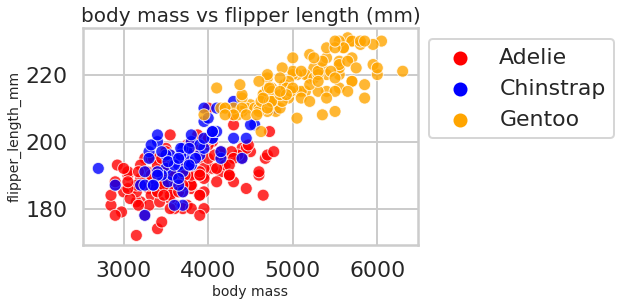

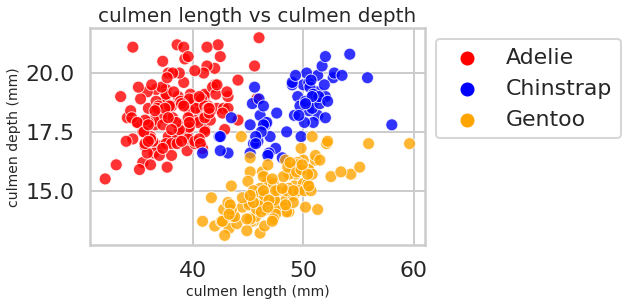

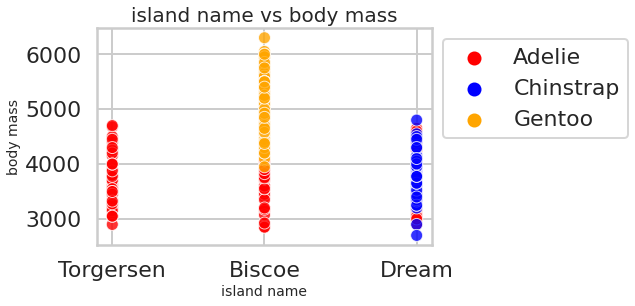

In [51]:
palette = ["red", "blue", "orange"]

# https://seaborn.pydata.org/generated/seaborn.scatterplot.html
sns.scatterplot(data=df_penguins, x = 'body_mass_g', y = 'flipper_length_mm', 
               hue = 'species', palette=palette, alpha=0.8)

plt.xlabel('body mass', fontsize=14)
plt.ylabel('flipper_length_mm', fontsize=14)
plt.title('body mass vs flipper length (mm)', fontsize=20)
plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left')
plt.show()

# create other visualizations
sns.scatterplot(data=df_penguins, x = 'culmen_length_mm', y = 'culmen_depth_mm', 
               hue = 'species', palette=palette, alpha=0.8)

plt.xlabel('culmen length (mm)', fontsize=14)
plt.ylabel('culmen depth (mm)', fontsize=14)
plt.title('culmen length vs culmen depth', fontsize=20)
plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left')
plt.show()

sns.scatterplot(data=df_penguins, x = 'island', y = 'body_mass_g', 
               hue = 'species', palette=palette, alpha=0.8)

plt.xlabel('island name', fontsize=14)
plt.ylabel('body mass', fontsize=14)
plt.title('island name vs body mass', fontsize=20)
plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left')
plt.show()

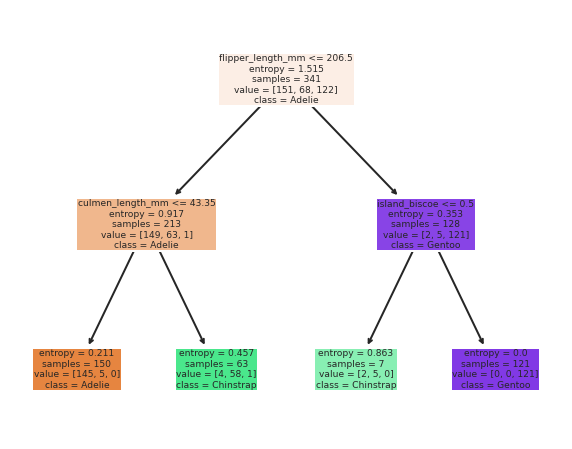

Best Score:99.12%


In [61]:
# design a classification model
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier

X, y, feature_names, class_names = get_penguin_xy(df_penguins)

# model = DecisionTreeClassifier(max_depth=2, criterion='gini', random_state=0)
model = DecisionTreeClassifier(max_depth=2, criterion='entropy', random_state=0)


# Training the model on the dataset
model.fit(X, y)

# Visualizing the decision tree
plt.figure(figsize=(10,8))
plot_tree(model, feature_names=feature_names, class_names=class_names, filled=True)
plt.show()



# part3
model = RandomForestClassifier(n_estimators=150, max_depth = 8)

best_score = cross_val_score(model,np.array(X), np.array(y), cv=5)

percentage = best_score.mean() * 100
print('Best Score:{:.2f}%'.format(percentage))

# # improvement
# df_penguins['predicted_class'] = 'unknown'
# df_penguins.loc[(df_penguins['culmen_depth_mm'] <= 15) & (df_penguins['flipper_length_mm'] > 220), 'predicted_class'] = 'Gentoo'
# accuracy = sum(df_penguins['predicted_class'] == df_penguins['species']) / len(df_penguins)
# print('Accuracy of the second rule:', accuracy)

## Part 4: Stretch Goals
Include any new code needed for Part 4 here